In [41]:
import pandas as pd

In [42]:
df=pd.read_csv("orderList.csv")
df1=pd.read_csv("FreightRates.csv")
df2=pd.read_csv("WhCapacities.csv")
df3=pd.read_csv("ProductsPerPlant.csv")
df4=pd.read_csv("WhCosts.csv")
df5=pd.read_csv("PlantPorts.csv")

In [71]:
df.columns

Index(['Unnamed: 0', 'ORDER_ID', 'ORDER_DATE', 'ORIGIN_PORT', 'CARRIER', 'TPT',
       'SERVICE_LEVEL', 'SHIP_AHEAD_DAY_COUNT', 'SHIP_LATE_DAY_COUNT',
       'CUSTOMER', 'PRODUCT_ID', 'PLANT_CODE', 'DESTINATION_PORT',
       'UNIT_QUANTITY', 'WEIGHT', 'ORIG_PORT_CD', 'DEST_PORT_CD',
       'MINM_WGH_QTY', 'MAX_WGH_QTY', 'SVC_CD', 'MINIMUM_COST', 'RATE',
       'MODE_DSC', 'TPT_DAY_CNT', 'CARRIER_TYPE', 'WH', 'COST_UNIT', 'COST'],
      dtype='object')

In [75]:
del df["Unnamed: 0"]
del df1["Unnamed: 0"]

In [73]:
df.describe()

,ORDER_ID,TPT,SHIP_AHEAD_DAY_COUNT,SHIP_LATE_DAY_COUNT,PRODUCT_ID,UNIT_QUANTITY,WEIGHT,MINM_WGH_QTY,MAX_WGH_QTY,MINIMUM_COST,RATE,TPT_DAY_CNT,COST_UNIT,COST
count,2.085480e+05,208548.000000,208548.000000,208548.000000,2.085480e+05,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000
mean,1.447273e+09,1.624374,1.931987,0.037881,1.680153e+06,2664.160021,16.350336,420.013605,12770.395519,9.900351,0.132569,2.096975,0.527681,1597.678289
std,8.414006e+04,0.496295,2.059308,0.313074,1.450609e+04,14966.032979,49.284847,628.169544,32193.967016,21.315896,0.272103,0.701241,0.056108,8684.093299
min,1.447126e+09,0.000000,0.000000,0.000000,1.613321e+06,235.000000,0.000000,0.000000,0.500000,1.202000,0.042400,0.000000,0.465071,122.905694
25%,1.447195e+09,1.000000,0.000000,0.000000,1.671942e+06,328.000000,1.404421,1.510000,99.990000,1.499200,0.048400,2.000000,0.517502,202.688741
50%,1.447273e+09,2.000000,1.000000,0.000000,1.683634e+06,437.000000,4.484133,100.000000,299.990000,3.455200,0.056400,2.000000,0.517502,305.286643
75%,1.447345e+09,2.000000,3.000000,0.000000,1.689547e+06,955.000000,13.080000,500.000000,1999.990000,3.455200,0.082400,3.000000,0.517502,634.937701
max,1.447425e+09,3.000000,6.000000,6.000000,1.702224e+06,561847.000000,2338.405126,2000.000000,99999.990000,101.827200,13.278400,3.000000,1.919808,337053.078104


In [76]:
df1.describe()

,MINM_WGH_QTY,MAX_WGH_QTY,MINIMUM_COST,RATE,TPT_DAY_CNT
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,156.190905,4635.433438,12.300002,2.875135,2.188679
std,476.366708,20271.070359,22.959164,4.590475,2.002161
min,0.000000,0.453592,1.202000,0.033200,0.000000
25%,15.010000,21.500000,3.656800,0.451200,1.000000
50%,41.281408,47.500000,7.403200,1.656800,2.000000
75%,67.510000,75.000000,11.480000,3.916800,2.000000
max,10000.000000,99999.990000,425.027200,128.027200,14.000000


In [77]:
correlation_matrix = df.corr(numeric_only=True).round(2)
correlation_matrix

,ORDER_ID,TPT,SHIP_AHEAD_DAY_COUNT,SHIP_LATE_DAY_COUNT,PRODUCT_ID,UNIT_QUANTITY,WEIGHT,MINM_WGH_QTY,MAX_WGH_QTY,MINIMUM_COST,RATE,TPT_DAY_CNT,COST_UNIT,COST
ORDER_ID,1.00,-0.02,-0.03,-0.03,0.03,0.01,0.00,-0.01,-0.01,0.01,0.01,-0.02,-0.01,0.01
TPT,-0.02,1.00,-0.13,0.06,-0.23,0.15,0.09,0.28,0.28,-0.40,-0.37,0.66,0.10,0.13
SHIP_AHEAD_DAY_COUNT,-0.03,-0.13,1.00,-0.02,0.08,-0.07,-0.01,-0.05,-0.05,0.07,0.06,-0.11,0.08,-0.07
SHIP_LATE_DAY_COUNT,-0.03,0.06,-0.02,1.00,-0.04,-0.01,-0.01,0.02,0.02,-0.03,-0.02,0.05,-0.02,-0.01
PRODUCT_ID,0.03,-0.23,0.08,-0.04,1.00,0.03,-0.04,-0.06,-0.06,0.09,0.09,-0.15,-0.09,0.03
UNIT_QUANTITY,0.01,0.15,-0.07,-0.01,0.03,1.00,0.43,0.03,0.03,-0.04,-0.03,0.06,-0.03,0.99
WEIGHT,0.00,0.09,-0.01,-0.01,-0.04,0.43,1.00,0.02,0.02,-0.02,0.02,0.04,0.05,0.43
MINM_WGH_QTY,-0.01,0.28,-0.05,0.02,-0.06,0.03,0.02,1.00,0.94,0.16,-0.19,0.20,-0.02,0.02
MAX_WGH_QTY,-0.01,0.28,-0.05,0.02,-0.06,0.03,0.02,0.94,1.00,-0.08,-0.12,0.21,-0.02,0.02
MINIMUM_COST,0.01,-0.40,0.07,-0.03,0.09,-0.04,-0.02,0.16,-0.08,1.00,-0.06,-0.30,0.03,-0.04


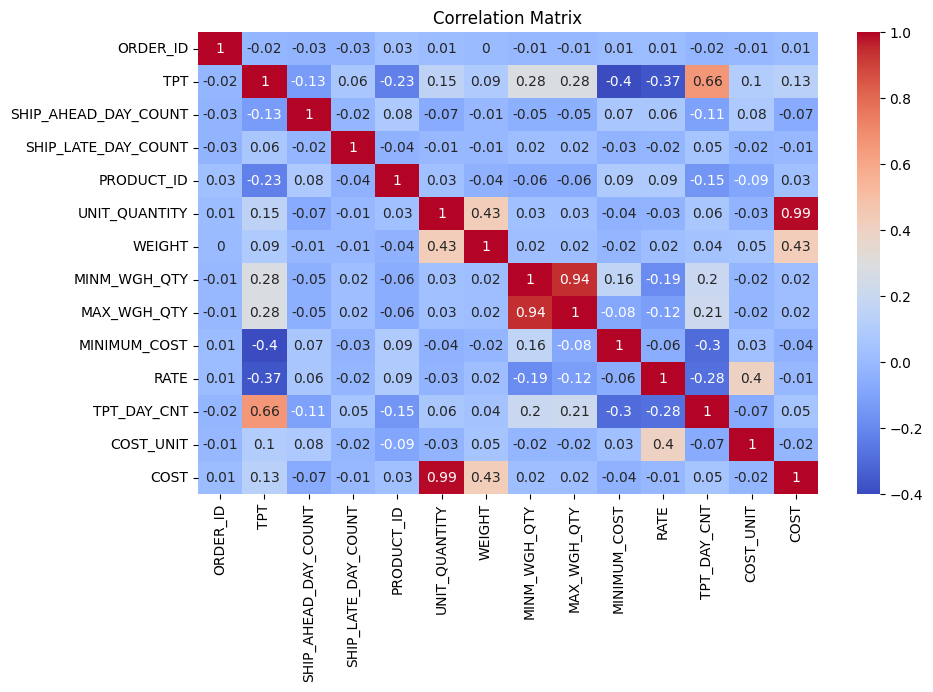

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [48]:
# Qiymətləndirmə və Gəlir Məlumatı
pricing_strategy = df1['MODE_DSC'].unique()
price_elasticity = df1['RATE'].mean()
historical_revenue = df['UNIT_QUANTITY'] * df['COST']
total_revenue = historical_revenue.sum()
print("qiymet :", pricing_strateg)
print("Orta qiymət elastikliyi:", price_elasticity)
print("Ümumi tarixi gəlir:", total_revenue)

Pricing strategies: ['AIR   ' 'GROUND']
Average price elasticity: 2.875135211279718
Total historical revenue: 27855522352652.188


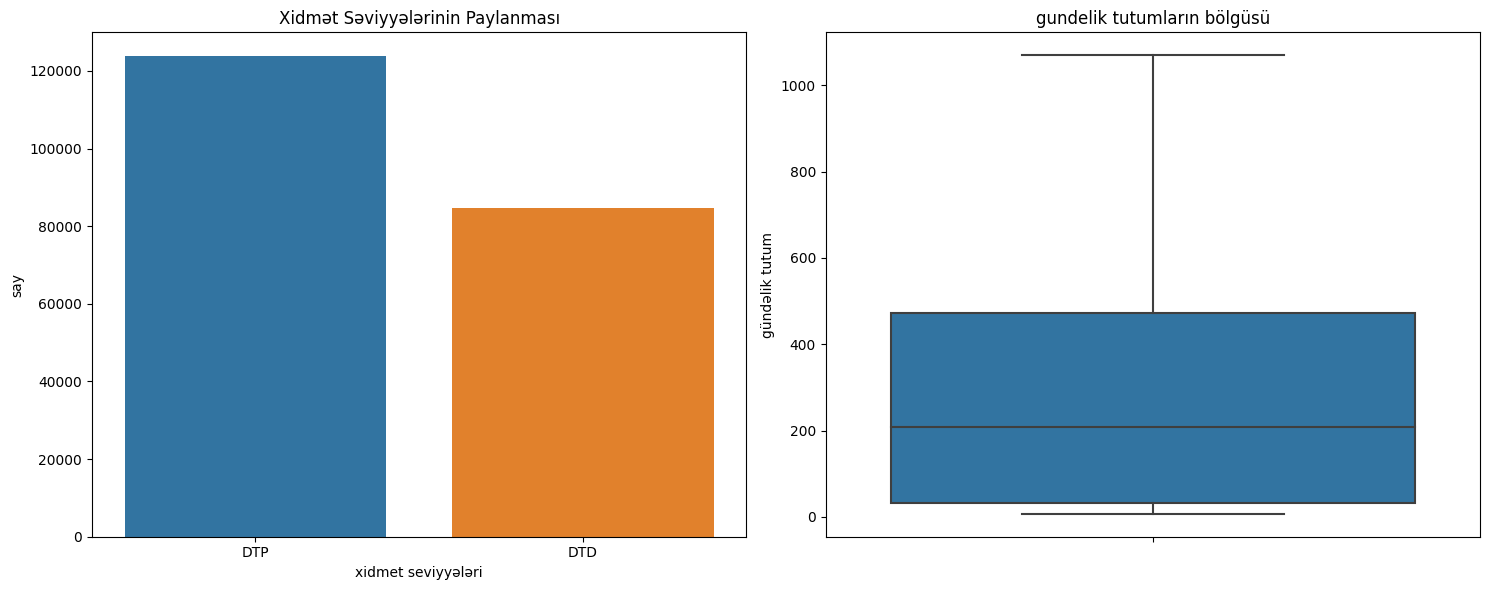

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(data=df, x='SERVICE_LEVEL', ax=axes[0])
axes[0].set_title('Xidmət Səviyyələrinin Paylanması')
axes[0].set_xlabel('xidmet seviyyələri')
axes[0].set_ylabel('say')
sns.boxplot(data=df2, y='DAILY_CAPACITY', ax=axes[1])
axes[1].set_title('gundelik tutumların bölgüsü')
axes[1].set_ylabel('gündəlik tutum')
plt.tight_layout()
plt.show()

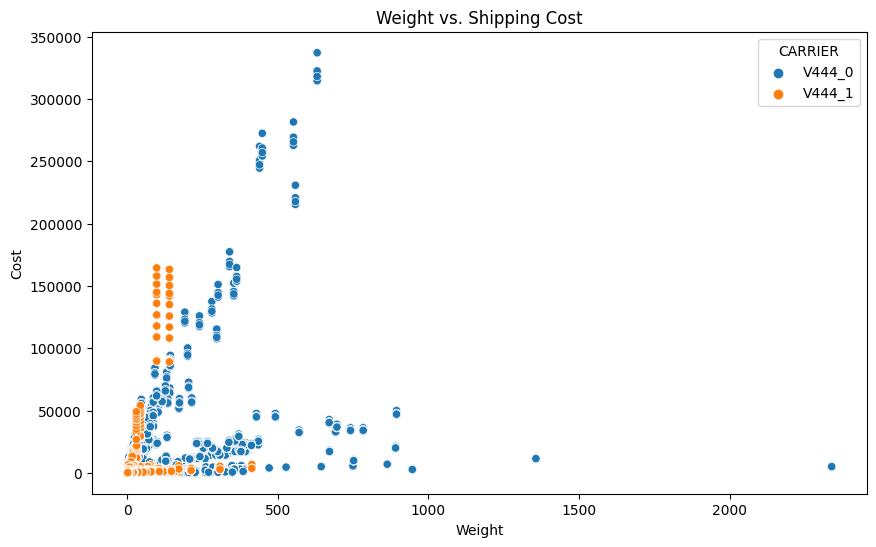

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='WEIGHT', y='COST', hue='CARRIER')
plt.title('Weight vs. Shipping Cost')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

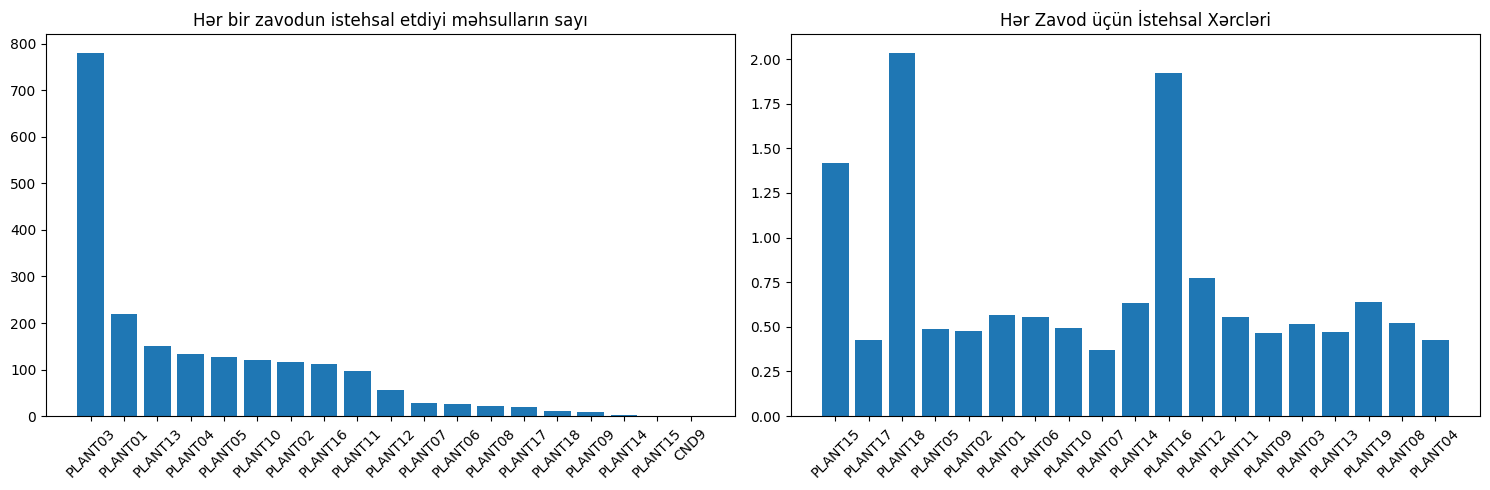

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axes[0])
plt.xticks(rotation=45)
plant_counts = pd.DataFrame(df3['PLANT_CODE'].value_counts())
axes[0].bar(plant_counts.index, plant_counts['count'])
axes[0].set_title("Hər bir zavodun istehsal etdiyi məhsulların sayı")

plt.sca(axes[1])
plt.xticks(rotation=45)
axes[1].bar(df4['WH'], df4["COST_UNIT"])
axes[1].set_title("Hər Zavod üçün İstehsal Xərcləri")

plt.tight_layout()

plt.show()

In [52]:
df3

,Unnamed: 0,PLANT_CODE,PRODUCT_ID
0,0,PLANT15,1698815
1,1,PLANT17,1664419
2,2,PLANT17,1664426
3,3,PLANT17,1672826
4,4,PLANT17,1674916
...,...,...,...
2031,2031,PLANT04,1699951
2032,2032,PLANT04,1699952
2033,2033,PLANT04,1699953
2034,2034,PLANT04,1699954


In [53]:
plant_counts

,count
PLANT_CODE,
PLANT03,781
PLANT01,220
PLANT13,150
PLANT04,134
PLANT05,127
PLANT10,121
PLANT02,116
PLANT16,113
PLANT11,96


In [54]:
df3['PLANT_CODE'].value_counts()

PLANT_CODE
PLANT03    781
PLANT01    220
PLANT13    150
PLANT04    134
PLANT05    127
PLANT10    121
PLANT02    116
PLANT16    113
PLANT11     96
PLANT12     57
PLANT07     29
PLANT06     26
PLANT08     21
PLANT17     20
PLANT18     12
PLANT09      8
PLANT14      3
PLANT15      1
CND9         1
Name: count, dtype: int64

In [55]:
#göndərmə limnaları və anbarlar arasında əlaqə
import plotly.graph_objects as go
fig = go.Figure()
for _, row in df5.iterrows():
    fig.add_trace(
        go.Scatter(
            x = [row['PLANT_CODE'], row['PORT']],
            y = [1, 0],
            mode = 'lines+markers',
            marker = dict(
                size = 10,
                symbol = 'circle',
                line = dict(
                    color = 'blue',
                    width = 2
                )
            ),
            hoverinfo = 'text',
            text = f"Plant: {row['PLANT_CODE']}<br>Port: {row['PORT']}",
        )
    )
fig.update_layout(
    title_text = 'Plant and Port Connections',
    showlegend = False,
    xaxis = dict(
        title = 'PLANT_CODE - PORT',
        tickangle = -45
    ),
    yaxis = dict(
        title = '',
        showticklabels = False,
        range = [-0.2, 1.2]
    )
)

fig.show()
    

In [80]:
# anbarlar üçün bir siyahı yaradırıq
supply_nodes = list(df4['WH'])
# anbarların ümumi tutumunu dictə əlavə ein
supply_dict = {}
for node in supply_nodes:
    total_capacity = sum(df2['DAILY_CAPACITY'][df2['PLANT_ID'] == node])
    supply_dict[node] = total_capacity
# portlar üçün list yaradırıq
demand_nodes = list(df['DESTINATION_PORT'].unique())

# hər bir portun tutumunu dictə əlavə edirik
demand_dict = {}
for index, row in df.iterrows():
    dest_port = row['DESTINATION_PORT']
    unit_quantity = row['UNIT_QUANTITY']
    if dest_port in demand_dict:
        demand_dict[dest_port] += unit_quantity
    else:
        demand_dict[dest_port] = unit_quantity    

In [81]:
# Hər bir nəqliyyat yolunun xərclərinin siyahısını yaradır
costs = []
for index, row in df.iterrows():
    carrier = row['CARRIER']
    orig_port = row['ORIG_PORT_CD']
    dest_port = row['DEST_PORT_CD']
    weight = row['WEIGHT']
    
    matching_rates = df1[(df1['CARRIER'] == carrier) &
                                  (df1['ORIG_PORT_CD'] == orig_port) &
                                  (df1['DEST_PORT_CD'] == dest_port) &
                                  (df1['MINM_WGH_QTY'] <= weight) &
                                  (df1['MAX_WGH_QTY'] >= weight)]['RATE']
    
    rate = matching_rates.values[0] if not matching_rates.empty else None
    costs.append(rate)

In [82]:
# anbarları açar kimi, portları alt açarlar və xərclər dəyər kimi olan lüğət yaradın
cost_dict = {}
for supply_node in supply_nodes:
    cost_dict[supply_node] = {}
    for demand_node in demand_nodes:
        cost_dict[supply_node][demand_node] = costs.pop(0)

In [83]:
from pulp import *
prob = LpProblem("MaterialSupplyProblem", LpMinimize)

#Nəqliyyat üçün bütün mümkün marşrutları özündə cəmləşdirən dəstlərin list yaradır
Routes = [(w, b) for w in supply_nodes for b in demand_nodes]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (supply_nodes, demand_nodes), 0, None, LpInteger)

#minimum məksəd funksiyası
prob += lpSum([vars[w][b] * cost_dict[w][b] for (w, b) in Routes]), "Sum_of_Transporting_Costs"

In [84]:
# Təchizat maksimum məhdudiyyətləri hər bir təchizat qovşağı (anbarlar) üçün sınaqlara əlavə edilir.
for w in supply_nodes:
    prob += (
        lpSum([vars[w][b] for b in demand_nodes]) <= supply_dict[w],
        "Sum_of_Products_out_of_warehouses_%s" % w,
    )

# Tələb minimum məhdudiyyətləri hər bir tələb node (layihə) üçün prob əlavə edilir
for b in demand_nodes:
    prob += (
        lpSum([vars[w][b] for w in supply_nodes]) >= demand_dict[b],
        "Sum_of_Products_into_projects%s" % b,
    )

# bir qovşaqdan özünə marşrutların qarşısını almaq üçün
for w in supply_nodes:
    for b in demand_nodes:
        if w != b:  
            prob += (vars[w][b] >= 0, "No_Self_Transportation_%s_%s" % (w, b))
        else:
            prob += (vars[w][b] == 0, "No_Self_Transportation_%s_%s" % (w, b))
            vars[w][b].lowBound = 0

In [85]:
prob.solve()


for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# Optimallaşdırılmış məqsəd funksiyasının dəyəri ekrana çap olunur
print("Value of Objective Function = ", value(prob.objective))

Route_PLANT01_PORT09 = 1070.0
Route_PLANT02_PORT09 = 138.0
Route_PLANT03_PORT09 = 555600470.0
Route_PLANT04_PORT09 = 554.0
Route_PLANT05_PORT09 = 385.0
Route_PLANT06_PORT09 = 49.0
Route_PLANT07_PORT09 = 265.0
Route_PLANT08_PORT09 = 14.0
Route_PLANT09_PORT09 = 11.0
Route_PLANT10_PORT09 = 118.0
Route_PLANT11_PORT09 = 332.0
Route_PLANT12_PORT09 = 209.0
Route_PLANT13_PORT09 = 490.0
Route_PLANT14_PORT09 = 549.0
Route_PLANT15_PORT09 = 11.0
Route_PLANT16_PORT09 = 457.0
Route_PLANT17_PORT09 = 8.0
Route_PLANT18_PORT09 = 111.0
Route_PLANT19_PORT09 = 7.0
Value of Objective Function =  6821943477.0432


In [121]:
das = pd.DataFrame()
for v in prob.variables():
     das.loc[len(das),['N','WH','destination_port']] = v.name.split('_')
     das.loc[len(das) -1,'value'] = v.varValue

In [124]:
das.sort_values(by = 'value')

,N,WH,destination_port,value
18,Route,PLANT19,PORT09,7.0
16,Route,PLANT17,PORT09,8.0
14,Route,PLANT15,PORT09,11.0
8,Route,PLANT09,PORT09,11.0
7,Route,PLANT08,PORT09,14.0
5,Route,PLANT06,PORT09,49.0
17,Route,PLANT18,PORT09,111.0
9,Route,PLANT10,PORT09,118.0
1,Route,PLANT02,PORT09,138.0
11,Route,PLANT12,PORT09,209.0


In [64]:
df.isnull().sum()

Unnamed: 0              0
ORDER_ID                0
ORDER_DATE              0
ORIGIN_PORT             0
CARRIER                 0
TPT                     0
SERVICE_LEVEL           0
SHIP_AHEAD_DAY_COUNT    0
SHIP_LATE_DAY_COUNT     0
CUSTOMER                0
PRODUCT_ID              0
PLANT_CODE              0
DESTINATION_PORT        0
UNIT_QUANTITY           0
WEIGHT                  0
ORIG_PORT_CD            0
DEST_PORT_CD            0
MINM_WGH_QTY            0
MAX_WGH_QTY             0
SVC_CD                  0
MINIMUM_COST            0
RATE                    0
MODE_DSC                0
TPT_DAY_CNT             0
CARRIER_TYPE            0
WH                      0
COST_UNIT               0
COST                    0
dtype: int64

In [89]:
df1

,CARRIER,ORIG_PORT_CD,DEST_PORT_CD,MINM_WGH_QTY,MAX_WGH_QTY,SVC_CD,MINIMUM_COST,RATE,MODE_DSC,TPT_DAY_CNT,CARRIER_TYPE
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0
...,...,...,...,...,...,...,...,...,...,...,...
1532,V444_8,PORT03,PORT09,0.0,99.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1533,V444_8,PORT03,PORT09,500.0,1999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0
1534,V444_8,PORT03,PORT09,250.0,499.99,DTD,29.3392,0.4116,AIR,0,V88888888_0
1535,V444_8,PORT03,PORT09,2000.0,99999.99,DTD,29.3392,0.3112,AIR,0,V88888888_0


In [90]:
Routes

[('PLANT15', 'PORT09'),
 ('PLANT17', 'PORT09'),
 ('PLANT18', 'PORT09'),
 ('PLANT05', 'PORT09'),
 ('PLANT02', 'PORT09'),
 ('PLANT01', 'PORT09'),
 ('PLANT06', 'PORT09'),
 ('PLANT10', 'PORT09'),
 ('PLANT07', 'PORT09'),
 ('PLANT14', 'PORT09'),
 ('PLANT16', 'PORT09'),
 ('PLANT12', 'PORT09'),
 ('PLANT11', 'PORT09'),
 ('PLANT09', 'PORT09'),
 ('PLANT03', 'PORT09'),
 ('PLANT13', 'PORT09'),
 ('PLANT19', 'PORT09'),
 ('PLANT08', 'PORT09'),
 ('PLANT04', 'PORT09')]

In [91]:
vars

{'PLANT15': {'PORT09': Route_PLANT15_PORT09},
 'PLANT17': {'PORT09': Route_PLANT17_PORT09},
 'PLANT18': {'PORT09': Route_PLANT18_PORT09},
 'PLANT05': {'PORT09': Route_PLANT05_PORT09},
 'PLANT02': {'PORT09': Route_PLANT02_PORT09},
 'PLANT01': {'PORT09': Route_PLANT01_PORT09},
 'PLANT06': {'PORT09': Route_PLANT06_PORT09},
 'PLANT10': {'PORT09': Route_PLANT10_PORT09},
 'PLANT07': {'PORT09': Route_PLANT07_PORT09},
 'PLANT14': {'PORT09': Route_PLANT14_PORT09},
 'PLANT16': {'PORT09': Route_PLANT16_PORT09},
 'PLANT12': {'PORT09': Route_PLANT12_PORT09},
 'PLANT11': {'PORT09': Route_PLANT11_PORT09},
 'PLANT09': {'PORT09': Route_PLANT09_PORT09},
 'PLANT03': {'PORT09': Route_PLANT03_PORT09},
 'PLANT13': {'PORT09': Route_PLANT13_PORT09},
 'PLANT19': {'PORT09': Route_PLANT19_PORT09},
 'PLANT08': {'PORT09': Route_PLANT08_PORT09},
 'PLANT04': {'PORT09': Route_PLANT04_PORT09}}

In [93]:
prob 

MaterialSupplyProblem:
MINIMIZE
12.2784*Route_PLANT01_PORT09 + 12.2784*Route_PLANT02_PORT09 + 12.2784*Route_PLANT03_PORT09 + 12.2784*Route_PLANT04_PORT09 + 12.2784*Route_PLANT05_PORT09 + 12.2784*Route_PLANT06_PORT09 + 12.2784*Route_PLANT07_PORT09 + 12.2784*Route_PLANT08_PORT09 + 12.2784*Route_PLANT09_PORT09 + 12.2784*Route_PLANT10_PORT09 + 12.2784*Route_PLANT11_PORT09 + 12.2784*Route_PLANT12_PORT09 + 12.2784*Route_PLANT13_PORT09 + 12.2784*Route_PLANT14_PORT09 + 12.2784*Route_PLANT15_PORT09 + 12.2784*Route_PLANT16_PORT09 + 12.2784*Route_PLANT17_PORT09 + 12.2784*Route_PLANT18_PORT09 + 12.2784*Route_PLANT19_PORT09 + 0.0
SUBJECT TO
Sum_of_Products_out_of_warehouses_PLANT15: Route_PLANT15_PORT09 <= 11

Sum_of_Products_out_of_warehouses_PLANT17: Route_PLANT17_PORT09 <= 8

Sum_of_Products_out_of_warehouses_PLANT18: Route_PLANT18_PORT09 <= 111

Sum_of_Products_out_of_warehouses_PLANT05: Route_PLANT05_PORT09 <= 385

Sum_of_Products_out_of_warehouses_PLANT02: Route_PLANT02_PORT09 <= 138

Sum_of_

In [94]:
cost_dict

{'PLANT15': {'PORT09': 12.2784},
 'PLANT17': {'PORT09': 12.2784},
 'PLANT18': {'PORT09': 12.2784},
 'PLANT05': {'PORT09': 12.2784},
 'PLANT02': {'PORT09': 12.2784},
 'PLANT01': {'PORT09': 12.2784},
 'PLANT06': {'PORT09': 12.2784},
 'PLANT10': {'PORT09': 12.2784},
 'PLANT07': {'PORT09': 12.2784},
 'PLANT14': {'PORT09': 12.2784},
 'PLANT16': {'PORT09': 12.2784},
 'PLANT12': {'PORT09': 12.2784},
 'PLANT11': {'PORT09': 12.2784},
 'PLANT09': {'PORT09': 12.2784},
 'PLANT03': {'PORT09': 12.2784},
 'PLANT13': {'PORT09': 12.2784},
 'PLANT19': {'PORT09': 12.2784},
 'PLANT08': {'PORT09': 12.2784},
 'PLANT04': {'PORT09': 12.2784}}

In [95]:
supply_nodes

['PLANT15',
 'PLANT17',
 'PLANT18',
 'PLANT05',
 'PLANT02',
 'PLANT01',
 'PLANT06',
 'PLANT10',
 'PLANT07',
 'PLANT14',
 'PLANT16',
 'PLANT12',
 'PLANT11',
 'PLANT09',
 'PLANT03',
 'PLANT13',
 'PLANT19',
 'PLANT08',
 'PLANT04']

In [96]:
 demand_dict

{'PORT09': 555605244}

In [125]:
prob.variables()

[Route_PLANT01_PORT09,
 Route_PLANT02_PORT09,
 Route_PLANT03_PORT09,
 Route_PLANT04_PORT09,
 Route_PLANT05_PORT09,
 Route_PLANT06_PORT09,
 Route_PLANT07_PORT09,
 Route_PLANT08_PORT09,
 Route_PLANT09_PORT09,
 Route_PLANT10_PORT09,
 Route_PLANT11_PORT09,
 Route_PLANT12_PORT09,
 Route_PLANT13_PORT09,
 Route_PLANT14_PORT09,
 Route_PLANT15_PORT09,
 Route_PLANT16_PORT09,
 Route_PLANT17_PORT09,
 Route_PLANT18_PORT09,
 Route_PLANT19_PORT09]